<a href="https://colab.research.google.com/github/Shreyareddyalluri/Kidney-stone-Detection/blob/main/Kidney_Stone_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import os
import pandas as pd
data_dir = "/content/gdrive/MyDrive/Stone"

img_size = (64, 64)

features = []
labels = []


for filename in os.listdir(data_dir):

    img = cv2.imread(os.path.join(data_dir, filename))

    img = cv2.resize(img, img_size)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    img_edges = cv2.Canny(img_gray, 100, 200)

    img_edges = img_edges / 255.0

    feature = img_edges.flatten()

    features.append(feature)
    labels.append(filename.split('.')[0])

df = pd.DataFrame(features, columns=[f'pixel_{i}' for i in range(len(features[0]))])
df['label'] = labels

df.to_csv('z.csv', index=False)

In [ ]:
import pandas as pd


dataset_path = "/content/z.csv"
df = pd.read_csv(dataset_path)


df.loc[df['label'].str.contains('Stone', case=False, na=False), 'label'] = 'Stone'
df.loc[df['label'].str.contains('Normal', case=False, na=False), 'label'] = 'No Stone'


df.to_csv(dataset_path, index=False)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (64, 64, 1)
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,273,090 (4.86 MB)

 Trainable params: 1,273,090 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

df = pd.read_csv('z.csv')


X = np.array(df.iloc[:, :-1])

y = df.iloc[:, -1].apply(lambda x: 0 if 'No Stone' in x else 1)


X = X.reshape(-1, 64, 64, 1)

y = keras.utils.to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

input_shape = (64, 64, 1)

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.save("my_cnn_model.h5")

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Testing loss: {loss}, Testing accuracy: {accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.9436 - loss: 0.2120 - val_accuracy: 0.9954 - val_loss: 0.0362
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.9912 - loss: 0.0556 - val_accuracy: 0.9954 - val_loss: 0.0279
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.9815 - loss: 0.1075 - val_accuracy: 0.9954 - val_loss: 0.0240
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 279ms/step - accuracy: 0.9884 - loss: 0.0432 - val_accuracy: 0.9954 - val_loss: 0.0207
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.9895 - loss: 0.0399 - val_accuracy: 0.9954 - val_loss: 0.0167
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9856 - loss: 0.0326 - val_accuracy: 0.9954 - val_loss: 0.0153
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - accuracy: 0.9911 - loss: 0.0200 - val_accuracy: 0.9954 - val_loss: 0.0062
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.9826 - loss: 0.0163 - val_accurac

In [ ]:
import cv2

import numpy as np

model = tf.keras.models.load_model("my_cnn_model.h5")

image = cv2.imread('/content/gdrive/MyDrive/Stone/Stone- (10).jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blur = cv2.GaussianBlur(gray, (5, 5), 0)


_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


largest_contour = max(contours, key=cv2.contourArea)


mask = np.zeros_like(gray)


cv2.drawContours(mask, [largest_contour], -1, (255), cv2.FILLED)


segmented_image = cv2.bitwise_and(image, image, mask=mask)



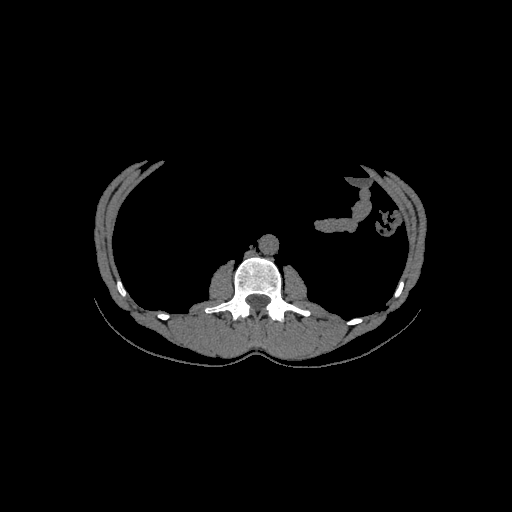

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(segmented_image)


In [ ]:
import cv2
import os
import numpy as np

gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(binary, kernel, iterations = 1)
dilation = cv2.dilate(erosion, kernel, iterations = 1)

num_stones = len(cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0])
stone_size = np.sum(dilation) / 255

In [ ]:

contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


marked_image = segmented_image.copy()
min_area_threshold=100
for contour in contours:

    area = cv2.contourArea(contour)


    if area < min_area_threshold :

        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x+w, y+h), (0, 255, 0), 2)





Stone Deteced
Stone: Width = 104, Height = 65


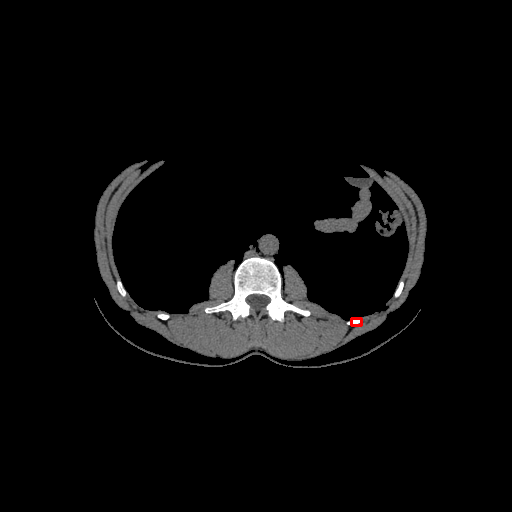

In [ ]:
from google.colab.patches import cv2_imshow


contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


marked_image = segmented_image.copy()
min_area_threshold = 100.0
stone_sizes = []

for contour in contours:
    area = cv2.contourArea(contour)

    if area > min_area_threshold:
      x, y, w, h = cv2.boundingRect(contour)



      stone_size = (w, h)
      stone_sizes.append(stone_size)


for i, size in enumerate(stone_sizes):
    if size[0] >50 and size[1] > 50:
        x, y, w, h = cv2.boundingRect(contours[i])
        cv2.rectangle(marked_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        print("Stone Deteced")
        print("Stone: Width = {}, Height = {}".format(size[0], size[1]))


cv2_imshow(marked_image)



No stones detected


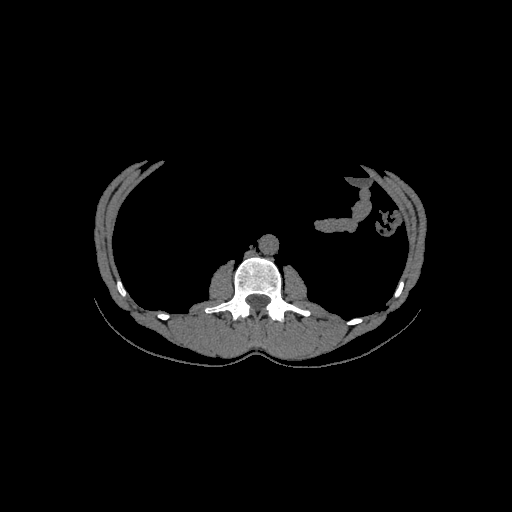

In [ ]:

contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


num_rectangles = 0


marked_image = segmented_image.copy()
min_area_threshold = 100
for contour in contours:



    if area < min_area_threshold:

        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


        num_rectangles += 1


if num_rectangles > 0:

    print("Number of rectangles marked: {}".format(num_rectangles))
else:
    print("No stones detected")


from google.colab.patches import cv2_imshow
cv2_imshow(marked_image)


In [ ]:
stone_sizes = []
for contour in contours:
    area = cv2.contourArea(contour)

    if area > min_area_threshold:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


        stone_size = (w, h)
        stone_sizes.append(stone_size)


for i, size in enumerate(stone_sizes):
    if size[0] > 50 and size[1] > 50:
        print("Stone: Width = {}, Height = {}".format( size[0], size[1]))

Stone: Width = 104, Height = 65


In [ ]:
stone_diameters = []

for contour in contours:
    area = cv2.contourArea(contour)

    if area > min_area_threshold:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(marked_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


        stone_diameter = max(w, h)
        stone_diameters.append(stone_diameter)


for i, diameter in enumerate(stone_diameters):
    size = stone_sizes[i]
    if size[0] > 50 and size[1] > 50 and size[1] > 50:
        print(" Stone : Diameter = {}mm".format(diameter))



 Stone : Diameter = 104mm
